In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = './Pymaceuticals/data/Mouse_metadata.csv'
study_results_path = "./Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_merged = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')


# Display the data table for preview
data_merged.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

len(data_merged["Mouse ID"].value_counts())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


duplicate_data = data_merged[data_merged.duplicated(["Mouse ID", "Timepoint"])]
duplicate_data.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = data_merged.loc[data_merged['Mouse ID'] == "g989",:]
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# clean_mouse = data_merged.drop_duplicates(subset = ["Mouse ID","Timepoint"])

clean_mouse = data_merged.loc[data_merged['Mouse ID'] != "g989",:]
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

len(clean_mouse["Mouse ID"].value_counts())



248

In [7]:


# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_groups = clean_mouse.groupby(["Drug Regimen"])

# Get average/mean of tumor volume
Average_tv = round(drug_groups["Tumor Volume (mm3)"].mean(),2)

# Get the median of tumor volume
Median_tv = round(drug_groups["Tumor Volume (mm3)"].median(),2)

# Get the variance of tumor volume
Variance_tv = round(drug_groups["Tumor Volume (mm3)"].var(),2)

#Get the standard deviation of tumor volume
Standard_deviation_tv = round(drug_groups["Tumor Volume (mm3)"].std(),2)

#Get the SEM of tumor volume
SEM_tv = round(drug_groups["Tumor Volume (mm3)"].sem(),2)

#Create a new dataframe with new information

Drug_summary_df = pd.DataFrame({ "Mean Tumor Volume":Average_tv, 
                                    "Median Tumor Volume": Median_tv, 
                                    "Variance Tumor Volume": Variance_tv, 
                                    "Standard Deviation Tumor Volume": Standard_deviation_tv,
                                     "SEM Tumor Volume":SEM_tv})

Drug_summary_df



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Agg_drug_summary_df = round(drug_groups["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]),2)


Agg_drug_summary_df



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


<AxesSubplot:title={'center':'Total Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Mice'>

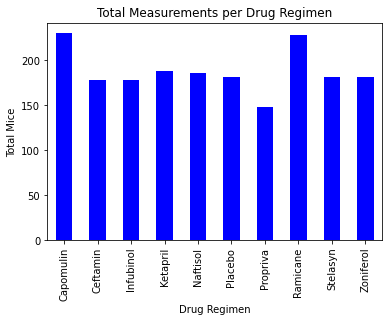

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


drug_regimen_ct = drug_groups["Mouse ID"].count()
drug_pdplot = drug_regimen_ct.plot.bar( rot = 90, title = "Total Measurements per Drug Regimen", fontsize =10, color = "blue")
drug_pdplot.set_xlabel("Drug Regimen")
drug_pdplot.set_ylabel("Total Mice")
drug_pdplot




<AxesSubplot:title={'center':'Total Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Mice'>

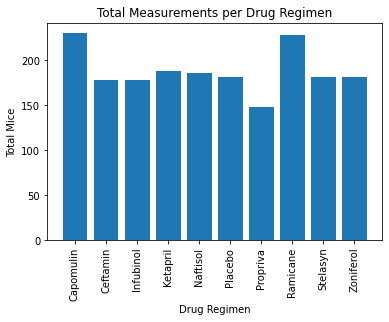

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_regimen_ct = drug_groups["Mouse ID"].count()
plt.bar(drug_regimen_ct.index.values,drug_regimen_ct.values)
plt.xticks(rotation = 90)
drug_pdplot.set_xlabel("Drug Regimen")
drug_pdplot.set_ylabel("Total Mice")
plt.title("Total Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
drug_pdplot



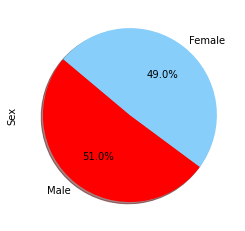

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_regimen_ct = clean_mouse["Sex"].value_counts()
colors = ["red","lightskyblue"]
drug_regimen_ct.plot.pie(colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

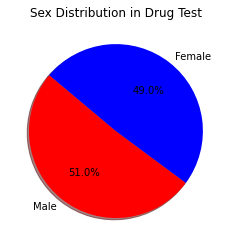

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

drug_regimen_ct = clean_mouse["Sex"].value_counts()
colors = ["red","blue"]
plt.pie(drug_regimen_ct.values,labels = drug_regimen_ct.index.values,
        colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sex Distribution in Drug Test")
plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint=clean_mouse.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tx_df = pd.merge(max_timepoint , clean_mouse, on=(["Mouse ID","Timepoint"]))
tx_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []


# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tx_regimen = tx_df.loc[tx_df["Drug Regimen"] == treatment]
    tumor_vol= tx_regimen['Tumor Volume (mm3)']

    
    tumor_vol_data.append(tumor_vol)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3

    


    
    
# Determine outliers using upper and lower bounds

lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)
   
    
    
    

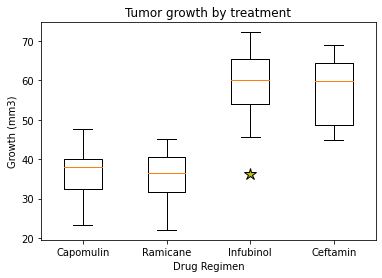

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='*', markerfacecolor='y', markersize=12,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)
plt.show()


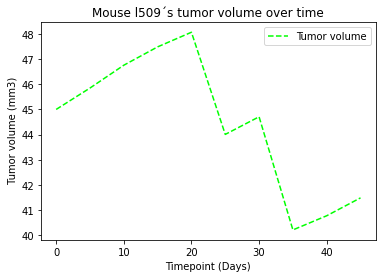

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_mice = clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin"]
cap_mice.value_counts("Mouse ID")


Mouse_l509 = clean_mouse.loc[clean_mouse["Mouse ID"] == "l509"]
tumor_y = Mouse_l509["Tumor Volume (mm3)"]
time_x = Mouse_l509["Timepoint"]
plt.plot(time_x, tumor_y, color="lime", label="Tumor volume", linestyle = "dashed")
plt.legend(loc="best")
plt.title( "Mouse l509´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(time_x), max(time_x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")
plt.show()



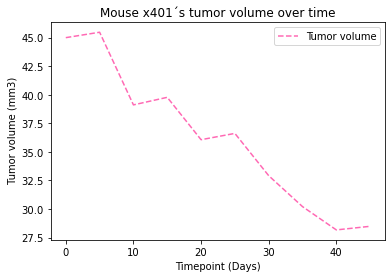

In [17]:
# Chose and extra mouse x401
Mouse_x = clean_mouse.loc[clean_mouse["Mouse ID"] == "x401"]
tumorx_y = Mouse_x["Tumor Volume (mm3)"]
timex_x = Mouse_x["Timepoint"]

# Plot our line that will be used to 
plt.plot(timex_x, tumorx_y, color="hotpink", label="Tumor volume", linestyle = "dashed")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Give titles and labels to graph
plt.title( "Mouse x401´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(timex_x), max(timex_x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")

# Print our chart to the screen
plt.show()

Text(0, 0.5, 'Tumor volume (mm3)')

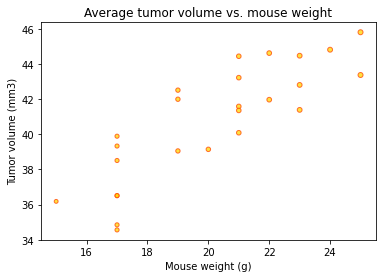

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_group =cap_mice.groupby(["Mouse ID"]).mean()
cap_group.head()

#Get average tumor volumen
avg_tumor_vol = cap_group["Weight (g)"]
avg_weight = cap_group["Tumor Volume (mm3)"]


plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="gold", edgecolors="orangered",
            s=avg_tumor_vol, alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")


The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723
y = 0.95x + 21.55


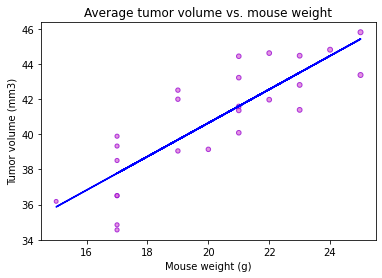

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_tumor_vol,avg_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol, avg_weight)
regress_values = avg_tumor_vol * slope + intercept

#Use the same scatterplot made before 
#Change colors 
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=avg_tumor_vol, alpha=0.75)
plt.plot(avg_tumor_vol,regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
